In [133]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [129]:
! cat approximately_8k_atoms_from_64k_atoms/conf8.gro

Liquid Argon
NaN
1Ar  Ar1 10.393 6.593 4.188 -0.1678 -0.5103 0.0715
2Ar  Ar2 5.070 2.690 5.298 -0.2916 0.1771 -0.4062
3Ar  Ar3 1.059 6.047 0.232 -0.1375 0.1507 -0.2089
4Ar  Ar4 8.917 1.280 6.478 -0.2467 0.1152 0.0419
5Ar  Ar5 8.918 3.684 4.822 0.0466 0.1779 0.0826
6Ar  Ar6 4.854 7.940 0.686 -0.1995 0.1605 -0.3349
7Ar  Ar7 14.719 0.778 2.233 0.4038 0.1433 -0.1307
8Ar  Ar8 0.588 1.518 0.573 -0.3825 0.0551 -0.0843
9Ar  Ar9 1.508 4.741 6.039 0.1591 0.1435 -0.3447
10Ar  Ar10 1.954 5.475 6.756 0.0162 -0.0414 -0.0345
11Ar  Ar11 13.906 6.727 2.162 -0.2574 -0.3026 0.0205
12Ar  Ar12 1.767 0.813 5.177 0.0458 0.2469 -0.2247
13Ar  Ar13 8.535 5.185 0.209 -0.1130 0.0741 -0.0292
14Ar  Ar14 2.912 5.886 3.309 -0.0041 0.3305 0.2006
15Ar  Ar15 1.430 4.062 1.434 -0.5686 -0.0883 0.0067
16Ar  Ar16 11.658 2.016 6.094 -0.2245 0.0046 -0.1635
17Ar  Ar17 9.468 7.928 7.848 0.1890 -0.3019 0.0804
18Ar  Ar18 3.699 7.730 3.857 -0.1892 0.4763 0.0120
19Ar  Ar19 3.670 6.833 5.464 -0.2491 -0.2580 0.0658
20Ar  Ar20 0.258 2

In [134]:
f = open('approximately_8k_atoms_from_64k_atoms/conf64.gro', 'r')
text = f.read()
f.close()

In [136]:
lines = text.splitlines()
lines[3:8], lines[-1]

(['    2Ar      Ar    2  15.325   0.163  10.869  0.1157 -0.2654 -0.0092',
  '    3Ar      Ar    3   7.671  15.710   0.008 -0.1283 -0.2400 -0.0046',
  '    4Ar      Ar    4  14.274  12.760  11.486  0.0238 -0.2844  0.1187',
  '    5Ar      Ar    5  10.809   9.108  12.931 -0.2517  0.0660  0.2674',
  '    6Ar      Ar    6  10.833   8.883  14.492  0.0493  0.0303 -0.0327'],
 '  16.21220  16.21220  16.21220')

In [196]:
import re
size = [float(d)/2 for d in lines[len(lines) - 1].split()]
size

[8.1061, 8.1061, 8.1061]

In [197]:
f = open('approximately_8k_atoms_from_64k_atoms/conf8.gro', 'w')
count = 0

for k in range(2,len(lines) - 1):
    line = re.sub(r'Ar\sAr', 'Arrr', lines[k])
    print(line)
    coords = list(map(float, line.split()[3:6]))
    is_in_region = all([coords[i] > size[i] for i in range(3)])
    if is_in_region:
        count += 1
        print(str(count) + 'Ar  Ar' + str(count) + ' ' + ' '.join(line.split()[2:8]), file=f)
    
        
f.close()
print(count)

    1Arrr    1   5.803  11.758  12.107 -0.1424 -0.3106 -0.2804
    2Arrr    2  15.325   0.163  10.869  0.1157 -0.2654 -0.0092
    3Arrr    3   7.671  15.710   0.008 -0.1283 -0.2400 -0.0046
    4Arrr    4  14.274  12.760  11.486  0.0238 -0.2844  0.1187
    5Arrr    5  10.809   9.108  12.931 -0.2517  0.0660  0.2674
    6Arrr    6  10.833   8.883  14.492  0.0493  0.0303 -0.0327
    7Arrr    7   0.866  11.322  10.291 -0.3355 -0.1964  0.0278
    8Arrr    8  10.393   6.593   4.188 -0.1678 -0.5103  0.0715
    9Arrr    9   5.070   2.690   5.298 -0.2916  0.1771 -0.4062
   10Arrr   10  11.404  14.664  10.094 -0.4432 -0.1210  0.2932
   11Arrr   11   5.168  12.985  12.678 -0.1522  0.3113  0.0839
   12Arrr   12   3.507   8.307   1.699  0.0976  0.1415  0.1638
   13Arrr   13  15.982  10.827  16.089  0.3113  0.0889 -0.1567
   14Arrr   14   1.059   6.047   0.232 -0.1375  0.1507 -0.2089
   15Arrr   15   0.870   3.124  14.043  0.1578  0.2796  0.5395
   16Arrr   16  13.161   5.055  12.887  0.1061  0.0754 

 2846Arrr 2846  15.537  12.903   3.044 -0.4512 -0.2858 -0.5097
 2847Arrr 2847  11.499   7.260   5.218 -0.0022 -0.3647  0.0758
 2848Arrr 2848   0.729  12.034   1.166  0.2284 -0.1603 -0.6726
 2849Arrr 2849   6.313  13.959  14.704 -0.4962  0.2019  0.0714
 2850Arrr 2850  14.987   2.139   1.900  0.1126 -0.1990 -0.2203
 2851Arrr 2851   2.407   1.555  11.113 -0.0526  0.2128  0.1541
 2852Arrr 2852  13.318   2.795   0.714  0.3554  0.0212  0.1820
 2853Arrr 2853   5.638  15.911   6.494 -0.2499 -0.2831  0.0474
 2854Arrr 2854   6.412  13.190   8.714 -0.3708  0.1118  0.3153
 2855Arrr 2855   9.327   4.119   8.507 -0.2722  0.0437 -0.2509
 2856Arrr 2856  10.096  11.727  14.301 -0.0558 -0.0891 -0.1963
 2857Arrr 2857   7.240  11.411   0.368 -0.1782  0.0590  0.2560
 2858Arrr 2858   6.099   1.339  10.073 -0.3486 -0.3069 -0.0927
 2859Arrr 2859  12.820   7.356  14.647  0.2187  0.2114 -0.0109
 2860Arrr 2860   0.488  11.736   6.491 -0.1758 -0.2038 -0.2374
 2861Arrr 2861   8.010   3.056  10.015 -0.1940 -0.0986 

 6346Arrr 6346   6.229  12.174  14.040  0.0424 -0.1318 -0.0131
 6347Arrr 6347   6.886  13.892   7.062  0.1631 -0.3786 -0.3001
 6348Arrr 6348  15.035  15.665   9.607 -0.0280  0.0093  0.0028
 6349Arrr 6349   6.094  13.817   0.039 -0.2373  0.0903  0.3408
 6350Arrr 6350  13.662  13.267   7.733  0.0162  0.2446 -0.0077
 6351Arrr 6351   5.267   6.028   9.237 -0.1900  0.1000 -0.1690
 6352Arrr 6352   7.941   9.029   8.142 -0.4225  0.0628 -0.2153
 6353Arrr 6353   9.106  10.524  12.401 -0.2287  0.1361 -0.4933
 6354Arrr 6354   5.179   0.448   3.749  0.2546  0.0167 -0.4894
 6355Arrr 6355  15.066   1.269  11.188  0.3214 -0.1638  0.4233
 6356Arrr 6356   7.404  16.198  12.532  0.0820  0.1598  0.1101
 6357Arrr 6357   4.975   3.118   4.341  0.0456  0.0242 -0.0877
 6358Arrr 6358   7.257  14.769   2.417 -0.0961  0.0283 -0.6853
 6359Arrr 6359   8.713   2.714  14.799 -0.0704  0.1727 -0.0278
 6360Arrr 6360   7.543   5.947   3.376  0.0481  0.3411  0.3480
 6361Arrr 6361   7.807  13.934   8.379 -0.0058 -0.8414 

 9845Arrr 9845  14.823   8.540  12.594  0.0510 -0.3169  0.1230
 9846Arrr 9846  12.554   3.423   2.506  0.0614 -0.2287 -0.1542
 9847Arrr 9847  12.215  11.839  14.417  0.2373 -0.0915  0.1964
 9848Arrr 9848   5.753  15.632   5.243  0.1320  0.5406  0.2212
 9849Arrr 9849   2.680   7.479   6.223 -0.0629 -0.0496 -0.2905
 9850Arrr 9850   2.949  14.512   8.515 -0.3632  0.2648 -0.2064
 9851Arrr 9851   0.120   7.266   0.524 -0.4280 -0.1992 -0.1471
 9852Arrr 9852   2.462   6.740   1.421  0.1093 -0.0351 -0.2254
 9853Arrr 9853  14.551  12.641  10.427 -0.1908 -0.3197  0.0758
 9854Arrr 9854  10.070   9.662  11.854  0.1150  0.1752 -0.1946
 9855Arrr 9855   1.693  13.921   9.453  0.0400 -0.0833 -0.0113
 9856Arrr 9856   0.802   8.835  10.089  0.2920  0.0353 -0.3326
 9857Arrr 9857   0.089  13.186   9.236  0.0469  0.1405 -0.0668
 9858Arrr 9858  10.556   1.248   8.073 -0.5273 -0.5471 -0.0768
 9859Arrr 9859   2.855   2.505  11.135 -0.0526  0.1144  0.4806
 9860Arrr 9860   2.959   0.233   7.328  0.0898 -0.3070 

13345Arrr13345   1.720   9.416   2.726 -0.3138  0.0576 -0.3407
13346Arrr13346  12.199   9.645  10.770 -0.1584 -0.2792 -0.0114
13347Arrr13347  10.561   5.865   4.502  0.3550 -0.1104 -0.0170
13348Arrr13348  13.516   6.998  10.241  0.4132  0.1213  0.2841
13349Arrr13349   4.079   6.387   4.147  0.0624 -0.0648 -0.1484
13350Arrr13350  14.987   4.707   4.151  0.0322  0.4005 -0.2151
13351Arrr13351   0.176  11.756   6.372  0.2103 -0.0507 -0.1301
13352Arrr13352   9.531   9.246  12.717  0.2972  0.1081 -0.2276
13353Arrr13353   1.710  15.775   2.070 -0.6002  0.0191  0.0895
13354Arrr13354   8.877   5.933   2.612  0.1093 -0.0741 -0.4410
13355Arrr13355  12.294  12.014   2.003  0.1109 -0.1700  0.1573
13356Arrr13356  15.361   8.421   2.117 -0.1198 -0.1477 -0.0180
13357Arrr13357   1.255   7.026  13.853  0.1249  0.0290  0.1786
13358Arrr13358   7.273  10.406  14.236  0.1097  0.2981  0.1213
13359Arrr13359   2.742  11.017   5.452  0.6862 -0.2931  0.1545
13360Arrr13360   9.498  15.868   5.359  0.0290 -0.4867 

16844Arrr16844   6.121   8.238  14.181 -0.2000 -0.1495  0.1768
16845Arrr16845   0.831   8.156   4.794 -0.1569 -0.0206  0.1066
16846Arrr16846   4.888   2.506   4.569 -0.0136  0.3104 -0.2149
16847Arrr16847  14.245  13.069   6.424 -0.0734 -0.0664  0.3171
16848Arrr16848   1.307  13.271  16.130  0.3802 -0.1009 -0.1052
16849Arrr16849   2.939   5.156  12.630 -0.4023 -0.3153  0.0327
16850Arrr16850   2.539  14.150  13.153  0.1591  0.1710  0.0906
16851Arrr16851  14.702  15.474   7.009 -0.0881 -0.4056  0.0307
16852Arrr16852  12.866   1.729   6.690  0.4299  0.1323 -0.5566
16853Arrr16853   4.894  10.392  13.461 -0.0029 -0.1013 -0.2780
16854Arrr16854  10.268  11.684   1.328 -0.1395 -0.0056  0.0469
16855Arrr16855   0.682   5.950  14.843  0.2396  0.1246  0.2481
16856Arrr16856   5.765  11.609  14.741  0.2054  0.1193  0.1272
16857Arrr16857  10.692   2.303   6.148  0.1517  0.0120 -0.1332
16858Arrr16858   5.846  12.102   9.845 -0.5928 -0.4595  0.4599
16859Arrr16859  12.904   4.132  15.128  0.1738 -0.0996 

20344Arrr20344   2.082   4.315   8.248 -0.1048 -0.0343  0.0155
20345Arrr20345   3.596   6.034   3.525 -0.1656  0.3461 -0.2821
20346Arrr20346   7.776   7.668   5.808  0.1857  0.3757 -0.0685
20347Arrr20347  13.574   8.660   1.102 -0.3315  0.3488 -0.6049
20348Arrr20348   2.298  10.200  15.136 -0.2259 -0.4174  0.4966
20349Arrr20349   8.121  10.992   8.212  0.0515  0.2212  0.1392
20350Arrr20350  12.196  14.044  11.167 -0.0713  0.6007  0.0299
20351Arrr20351   3.510   7.548   4.217  0.1421 -0.2029 -0.1163
20352Arrr20352   1.662   4.446  11.092  0.5245 -0.1856  0.3994
20353Arrr20353  12.272   3.592   2.263  0.4624  0.0653 -0.3285
20354Arrr20354  10.135  12.655  12.383  0.1216 -0.0531 -0.4540
20355Arrr20355   4.458  10.990  12.628 -0.0817  0.4562 -0.3968
20356Arrr20356  14.446  16.199  13.811  0.1290 -0.2119  0.3327
20357Arrr20357  15.545  15.956   1.742 -0.2261 -0.0247  0.4920
20358Arrr20358   7.144   4.819  16.198  0.4341 -0.0339  0.0078
20359Arrr20359  13.026  10.342  13.349 -0.3475 -0.5219 

23343Arrr23343  15.986   0.192   5.882  0.1602  0.1512  0.1578
23344Arrr23344   4.575  12.179  11.702 -0.0686  0.1243  0.2052
23345Arrr23345  11.927   2.578   5.586 -0.3184  0.1742 -0.2475
23346Arrr23346   0.894   2.231  10.215  0.4674  0.0285  0.0063
23347Arrr23347  14.002  14.880   3.333 -0.0210 -0.2467 -0.0194
23348Arrr23348   3.282  12.557   4.100 -0.1261 -0.0735 -0.2099
23349Arrr23349   4.944  11.300   6.537  0.1458 -0.1672 -0.0616
23350Arrr23350   3.895   4.399   6.299  0.1554  0.1636 -0.1074
23351Arrr23351  15.623  15.522  10.459 -0.0532 -0.1474  0.0157
23352Arrr23352  12.792   6.608   8.243 -0.2145 -0.1837 -0.1520
23353Arrr23353   9.667  12.106   1.336  0.0625  0.0068 -0.2251
23354Arrr23354   9.815  10.422  11.130  0.0068 -0.0884  0.0610
23355Arrr23355  12.320  15.608   4.806 -0.0425 -0.1638 -0.0666
23356Arrr23356  10.262   9.870  11.680  0.0392 -0.1400 -0.3241
23357Arrr23357  12.580  11.140   3.780  0.6240  0.0185  0.3375
23358Arrr23358   9.240   6.238  15.230  0.0216 -0.0159 

26843Arrr26843   8.985  16.204  10.190 -0.1041 -0.0483 -0.0116
26844Arrr26844   5.224   4.029   7.115 -0.0251  0.1478 -0.0115
26845Arrr26845   5.028   0.444  10.104  0.2792  0.1433 -0.0487
26846Arrr26846  13.458  10.926   6.899  0.3776  0.3281  0.4098
26847Arrr26847   3.858   9.984   8.430  0.1804  0.3580 -0.2059
26848Arrr26848  12.057   6.035   9.411 -0.1272  0.5100  0.1751
26849Arrr26849   7.461   3.908   3.549 -0.1530  0.3532  0.4172
26850Arrr26850   5.550   1.882   5.871 -0.0352 -0.1169  0.1164
26851Arrr26851  16.032   5.896  10.764 -0.3189 -0.1740  0.2295
26852Arrr26852   5.762   7.603   9.188 -0.2235  0.5420 -0.2567
26853Arrr26853   4.005   0.959  15.540  0.0042 -0.4243 -0.3649
26854Arrr26854   7.025   9.681   4.612 -0.0080  0.7119 -0.1060
26855Arrr26855  13.440   6.877   5.405 -0.4964  0.1464 -0.1415
26856Arrr26856   9.815   7.272  15.680 -0.1730  0.1777  0.3941
26857Arrr26857   6.574   2.989  12.923  0.0443  0.3453 -0.5338
26858Arrr26858  14.712  15.093   0.004  0.2431  0.4120 

30342Arrr30342   5.749  11.944   1.625 -0.1651  0.2726 -0.1587
30343Arrr30343   9.756  11.367  16.098  0.0253 -0.1585  0.1328
30344Arrr30344  10.383   5.353  16.176  0.1242  0.0415 -0.0269
30345Arrr30345   2.167  10.201   8.281 -0.0822 -0.2320  0.3375
30346Arrr30346  10.228  10.576  12.190  0.6484 -0.0973 -0.2744
30347Arrr30347  13.226  13.244   5.137 -0.1256  0.3631  0.3283
30348Arrr30348   1.230   1.550  15.468 -0.2056 -0.2210 -0.2140
30349Arrr30349  14.310  12.999  13.163 -0.0862  0.3020 -0.0359
30350Arrr30350   5.394   7.247  15.343  0.0501 -0.0501  0.0358
30351Arrr30351   5.956   1.310  15.434 -0.7508 -0.3389 -0.0375
30352Arrr30352   2.485   2.345   2.703 -0.1455  0.1990  0.2059
30353Arrr30353   4.722   1.320  11.228  0.2068 -0.0953  0.0001
30354Arrr30354   0.318   8.310   7.070  0.1279 -0.0074  0.1000
30355Arrr30355   0.304   5.737   2.719 -0.0833 -0.0554 -0.2054
30356Arrr30356   9.871   6.163   7.181  0.1130 -0.2684 -0.4012
30357Arrr30357  11.194  13.289   6.227  0.3531 -0.1847 

33842Arrr33842  13.519   3.169   3.988 -0.1208  0.0876 -0.0170
33843Arrr33843   4.181   3.626   7.463 -0.1622 -0.3436 -0.1213
33844Arrr33844   6.462   7.474   0.304  0.1065  0.3507  0.4395
33845Arrr33845   7.295   2.374   7.627  0.2441 -0.2672  0.0353
33846Arrr33846   6.220   1.111   9.100 -0.3127  0.1794  0.0724
33847Arrr33847  11.775   6.009  11.448  0.1141  0.0683  0.3256
33848Arrr33848  11.475   1.759  10.317 -0.1085 -0.2369  0.2956
33849Arrr33849   2.817   6.356  15.089 -0.3973  0.2321  0.3855
33850Arrr33850   7.859   8.679  12.194 -0.1149  0.1597 -0.0951
33851Arrr33851   0.247   8.272   8.780 -0.3110  0.2583  0.5046
33852Arrr33852  11.838  14.005   3.306  0.2234  0.0845  0.3470
33853Arrr33853   4.049  10.797   8.439 -0.2296 -0.2546  0.1575
33854Arrr33854   9.067   9.668  10.995 -0.1825  0.0518  0.0730
33855Arrr33855   0.099   6.363  12.811  0.4858  0.1656  0.2447
33856Arrr33856   2.145  15.210   6.730 -0.1612 -0.0051  0.2161
33857Arrr33857   4.419  10.194  15.552 -0.2266  0.0201 

37341Arrr37341  15.478  10.865  15.669 -0.0675  0.1428  0.1044
37342Arrr37342   3.861  13.029  12.111 -0.2721 -0.0320 -0.3666
37343Arrr37343   4.077   4.704   6.403  0.0245 -0.0207 -0.1038
37344Arrr37344   7.662  14.567   8.349 -0.0841  0.1352 -0.0639
37345Arrr37345   9.413   7.775   9.799  0.1020  0.1098  0.0354
37346Arrr37346   7.629  14.989   5.675 -0.1454 -0.0735 -0.0727
37347Arrr37347  14.904   1.995  11.579  0.1382 -0.2702  0.0675
37348Arrr37348   1.026  10.696  11.788  0.2412 -0.1302 -0.1008
37349Arrr37349   5.344   7.136   8.352  0.4190  0.2422  0.0150
37350Arrr37350  15.377   9.994   3.958  0.4063  0.3932  0.0465
37351Arrr37351  11.473  15.448  13.018  0.1719 -0.0120 -0.0841
37352Arrr37352  10.848   9.456  11.642  0.0193  0.0715 -0.0210
37353Arrr37353   3.901   6.120   1.207 -0.0241  0.0431  0.2836
37354Arrr37354   5.614   9.075  16.126  0.2410 -0.2953  0.1650
37355Arrr37355  15.229   1.795  14.850  0.2057  0.2324  0.1449
37356Arrr37356   9.592   4.721   8.054 -0.1916 -0.0186 

40841Arrr40841  15.526   3.378   8.554 -0.0185 -0.3628  0.0489
40842Arrr40842   3.885   0.077  14.970 -0.0457 -0.1174  0.1896
40843Arrr40843   5.073   6.656   3.823 -0.1639  0.1805  0.3199
40844Arrr40844   8.230   9.475  12.748 -0.1265 -0.1633 -0.3009
40845Arrr40845  15.235  12.968  11.811  0.3600 -0.1274 -0.1919
40846Arrr40846   2.413   6.040   7.786  0.1375 -0.0818 -0.1757
40847Arrr40847   2.939  15.192  13.153 -0.2288 -0.1050 -0.2605
40848Arrr40848  15.801  13.139  13.803 -0.0771 -0.2489 -0.1035
40849Arrr40849  10.833   7.823  11.117 -0.2257 -0.1009  0.2235
40850Arrr40850   3.682  10.012  12.840 -0.1422  0.0874  0.0478
40851Arrr40851  12.375  15.179  12.218  0.2499 -0.1303  0.0118
40852Arrr40852   3.713   4.688  15.951  0.0793 -0.3253  0.1176
40853Arrr40853  15.971   1.006   5.179 -0.0894  0.0442 -0.1592
40854Arrr40854  15.068   8.569  12.261  0.0751 -0.0768 -0.2614
40855Arrr40855   8.430   2.291  14.092  0.2898  0.0877  0.4082
40856Arrr40856  13.995  13.635   5.334 -0.4214 -0.2358 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



62838Arrr62838  13.245   2.219   7.360 -0.1008  0.0231  0.2655
62839Arrr62839  14.785   2.022  10.591  0.1109  0.4163 -0.1120
62840Arrr62840   5.117   6.218   5.197 -0.2724 -0.3311 -0.1581
62841Arrr62841   9.704  11.611   8.870  0.1422  0.0865  0.0563
62842Arrr62842  15.211  12.335   0.351  0.1194  0.4466  0.5256
62843Arrr62843  13.058   4.352  14.088 -0.0871  0.3128  0.3516
62844Arrr62844   7.757  15.375   2.319 -0.0653  0.0500  0.1117
62845Arrr62845   4.949  14.138  12.483  0.1298  0.2920 -0.2079
62846Arrr62846   6.841   4.230   0.647 -0.1140 -0.1569  0.0797
62847Arrr62847   6.857   2.322  14.314 -0.1592 -0.2362 -0.0874
62848Arrr62848  13.945   9.871  12.326  0.3657 -0.4459  0.2390
62849Arrr62849   2.903   1.727   8.335 -0.1091 -0.2148 -0.1410
62850Arrr62850   1.752  13.544   3.416 -0.0705  0.0894  0.0415
62851Arrr62851  16.093   9.055   8.533  0.2027  0.0311  0.1629
62852Arrr62852   1.375   8.161   3.354  0.1600  0.2156 -0.5637
62853Arrr62853   9.816   2.001   1.153 -0.2126  0.2160 

In [22]:
text = "\n".join(text2.split("\n"))

In [5]:
text

'-0.514696,0.118583,0.542865,-0.197373,0.523874,2.31018,-1.11721,-0.229309,-0.571051,-0.0976714,2.61631,\n-0.51543,0.115516,0.49159,-0.266973,0.560358,2.536,-1.25858,-0.184197,-0.56432,-0.0041575,3.15308,\n-0.430552,0.0839722,0.442199,-0.467451,0.764681,5.41569,-0.703546,-0.0748835,-1.98638,-0.112107,2.76988,\n-0.179739,0.0822714,0.519981,-0.957486,0.991114,19.0461,-0.609457,-0.0858795,3.44343,-0.019741,2.48862,\n-0.17983,0.146469,0.766563,-1.23525,0.915921,20.4906,-0.727039,-0.0149861,2.6337,0.0865394,2.56154,\n-0.210327,0.255277,0.475319,-4.06924,0.868056,-14.8334,-0.740645,0.0543331,0.797864,1.00116,2.03968,\n-0.0368584,-0.0100439,0.0783777,0.0630634,-0.158728,-0.170408,-0.0892252,0.0109349,0.025963,0.125568,0.324519,\n-0.0343934,-0.0103797,0.0786518,0.0594556,-0.167532,-0.176639,-0.0873868,0.0187761,0.0249052,0.124334,0.334583,\n-0.0271339,-0.0108582,0.103607,0.0637241,-0.154376,-0.1878,-0.0937889,0.0181296,0.0242513,0.132575,0.329739,\n-0.0247604,-0.0122198,0.107611,0.0702428,-0.1

In [10]:
df = pd.read_csv('8k_atoms_s_const/beta_values.csv', header=None)
# df = pd.DataFrame(df, columns=[1,2,3,4,5,0])

In [11]:
# df = df.drop([8000], axis=1)
df.shape

(20001, 12)

In [41]:
df[range(500, 1000,1)].describe()

KeyError: "None of [Int64Index([500, 501, 502, 503, 504, 505, 506, 507, 508, 509,\n            ...\n            990, 991, 992, 993, 994, 995, 996, 997, 998, 999],\n           dtype='int64', length=500)] are in the [columns]"

In [164]:
stat = df.describe()

In [165]:
stat.loc['25%']

0      -0.052917
1      -0.047748
2      -0.046927
3      -0.044768
4      -0.052558
5      -0.047492
6      -0.030483
7      -0.046826
8      -0.020231
9      -0.057549
10     -0.021145
11     -0.039114
12     -0.064283
13     -0.024826
14     -0.041238
15     -0.029979
16     -0.046502
17     -0.070868
18     -0.045867
19     -0.043445
20     -0.037219
21     -0.042938
22     -0.050857
23     -0.036171
24     -0.026956
25     -0.092921
26     -0.023246
27     -0.041958
28     -0.027259
29     -0.036562
          ...   
7970   -0.015414
7971   -0.051121
7972   -0.031981
7973   -0.045224
7974   -0.049498
7975   -0.048769
7976   -0.029381
7977   -0.065418
7978   -0.033120
7979   -0.011788
7980   -0.053343
7981   -0.060906
7982   -0.030405
7983   -0.080828
7984   -0.042925
7985   -0.039961
7986   -0.032587
7987   -0.062624
7988   -0.036899
7989   -0.066196
7990   -0.056056
7991   -0.076847
7992   -0.031207
7993   -0.031479
7994   -0.015536
7995   -0.017212
7996   -0.054078
7997   -0.0362

In [12]:
# stat.max().max()
# df.drop([11], axis=1)
df.columns = df.columns * 500


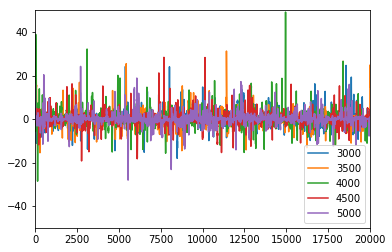

In [15]:
df[range(3000, 5500, 500)].plot(ylim=(-50,50)) # ylim=(-10,10))
plt.show()

In [38]:
df.describe().loc[['mean']]

0         500       1000      1500      2000      2500      3000  \
mean -0.124215  0.022609 -0.117862  0.167081  0.003309  0.001214 -0.069807   

          3500     4000      4500      5000  
mean  0.044439  0.17719  0.376209  0.546272

In [132]:
cat energy.py

#! /home/aware/anaconda3/bin/ipython

# coding: utf-8
# by Artemii Yanushevskyi

import os, sys
import pandas as pd
import matplotlib.pyplot as plt



try:
    case = sys.argv[1]
    f = open(os.path.join(case, 'energy.xvg'))
except FileNotFoundError as ex:
    print("File 'energy.xvg' doesn't exist. We need to convert the binary energy file (ener.edr) to energy text file (energy.xvg) using command `gmx energy` and typing '3 4 5 6'.")
    raise ex
except IndexError as ex:
    print("Write the version of the simulation.")
    raise ex

text = f.read()

X = []

# parsing
for line in text.split('\n'):
    if line != '':
        if line[0] in '#@' or line == '':
            if line[0:3] == '@ s':
                print(line[4:])
            continue

        values = map(float, line.split())
        print(line)
        X.append(list(values))


df = pd.DataFrame(X, columns=['index', 'Potential', 'Kinetic En.', 'Total Energy', 'Temperature']).drop('index', axis=1)
df.plot(ls='-', marker='.')


 legend "Potential"
 legend "Kinetic En."
 legend "Total Energy"
 legend "Temperature"
    0.000000  -4944.937012  31040.521484  26095.583984  311.148621
    0.100000  -4962.493652  31155.105469  26192.611328  312.297211
    0.200000  -4941.478027  31262.691406  26321.212891  313.375641
    0.300000  -4868.015625  31111.289062  26243.273438  311.858002
    0.400000  -4798.572754  30953.078125  26154.505859  310.272095
    0.500000  -4795.304688  30873.019531  26077.714844  309.469604
    0.600000  -4790.094727  30764.164062  25974.070312  308.378448
    0.700000  -4837.746582  30785.304688  25947.558594  308.590363
    0.800000  -4784.193848  30733.500000  25949.306641  308.071075
    0.900000  -4761.074707  30714.699219  25953.625000  307.882599
    1.000000  -4742.066895  30656.000000  25913.933594  307.294220
    1.100000  -4735.094727  30620.001953  25884.906250  306.933350
    1.200000  -4743.797363  30592.041016  25848.244141  306.653076
    1.300000  -4801.409180  30624.824219  

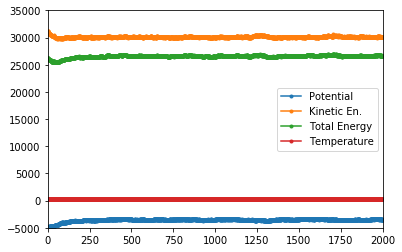

In [16]:
f = open('8k_atoms_s_const/energy.xvg')

text = f.read()

X = []

# parsing
for line in text.split('\n'):
    if line != '':
        if line[0] in '#@' or line == '':
            if line[0:3] == '@ s':
                print(line[4:])
            continue

        values = map(float, line.split())
        print(line)
        X.append(list(values))


df = pd.DataFrame(X, columns=['index', 'Potential', 'Kinetic En.', 'Total Energy', 'Temperature']).drop('index', axis=1)
df.plot(ls='-', marker='.', ylim=(-5000,35000))

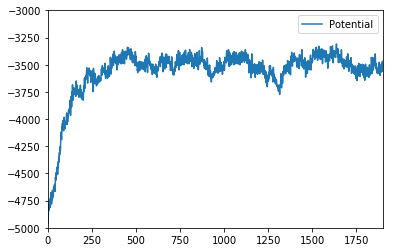

In [23]:
df[['Potential']].plot(xlim=(0, 1900), ylim=(-5000, -3000))

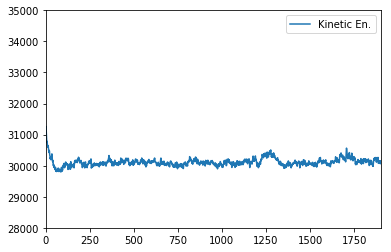

In [24]:
df[['Kinetic En.']].plot(xlim=(0, 1900), ylim=(28000, 35000))

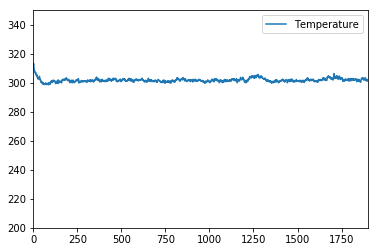

In [30]:
df[['Temperature']].plot(xlim=(0, 1900), ylim=(200, 350))

f_fh	dvec	[3]	
	0	double	0	
	1	double	0	
	2	double	0	
u_fh	dvec	[3]	
	0	double	0.00031306878480969987	
	1	double	-0.00063185489092305175	
	2	double	-8.2922801815350148e-05	
alpha_term	dvec	[3]	
	0	double	-0.14342687515457564	
	1	double	-0.1840991174577295	
	2	double	0.23306030952086437	
beta_term	dvec	[3]	
	0	double	-5.3262353485312222	
	1	double	0.1343480992136572	
	2	double	1.1217718977860023	
grad_ro	dvec	[3]	
	0	double	-145.94191970067013	
	1	double	58.511552046456238	
	2	double	78.237697582405332	
g_eps	const double	1e-10	

u_fh	dvec	[3]	
	0	double	0.00098727384054721505	
	1	double	0.00031857650587133765	
	2	double	0.00041400206892939085	
alpha_term	dvec	[3]	
	0	double	-0.066507084629378946	
	1	double	0.21659666050305748	
	2	double	-0.010076567044245838	
beta_term	dvec	[3]	
	0	double	-2.232607405600219	
	1	double	-4.8507771275044513	
	2	double	-0.51495509979050902	
grad_ro	dvec	[3]	
	0	double	-102.65261076358152	
	1	double	-154.64195077729985	
	2	double	10.955258317194751	



u_fh	dvec	[3]	
	0	double	0.00098825550110427933	
	1	double	0.00031850267361874224	
	2	double	0.00041380794817210212	
alpha_term	dvec	[3]	
	0	double	-0.062268155801937647	
	1	double	0.21854599435479236	
	2	double	-0.011535155691191686	
beta_term	dvec	[3]	
	0	double	-2.2189495482887702	
	1	double	-4.829181307210634	
	2	double	-0.5145353304383592	
grad_ro	dvec	[3]	
	0	double	-102.03811937569716	
	1	double	-154.71988423494972	
	2	double	10.931227123841319	
g_eps	const double	1e-10	


--

f_fh	dvec	[3]	
	0	double	0	
	1	double	0	
	2	double	0	
u_fh	dvec	[3]	
	0	double	0.00098629373069305431	
	1	double	0.00031865050318794663	
	2	double	0.00041419361854967988	
alpha_term	dvec	[3]	
	0	double	-0.062821328241552343	
	1	double	0.21511328356289722	
	2	double	-0.0096536207152783243	
beta_term	dvec	[3]	
	0	double	-2.2372763313551252	
	1	double	-4.8670724889563708	
	2	double	-0.51369626185414952	
grad_ro	dvec	[3]	
	0	double	-102.58780290497739	
	1	double	-155.32928421625959	
	2	double	10.979023827597509	
g_eps	const double	1e-10	

f_fh	dvec	[3]	
	0	double	0	
	1	double	0	
	2	double	0	
u_fh	dvec	[3]	
	0	double	0.00098727384054721505	
	1	double	0.00031857650587133765	
	2	double	0.00041400206892939085	
alpha_term	dvec	[3]	
	0	double	-0.066507084629378946	
	1	double	0.21659666050305748	
	2	double	-0.010076567044245838	
beta_term	dvec	[3]	
	0	double	-2.232607405600219	
	1	double	-4.8507771275044513	
	2	double	-0.51495509979050902	
grad_ro	dvec	[3]	
	0	double	-102.65261076358152	
	1	double	-154.64195077729985	
	2	double	10.955258317194751	
g_eps	const double	1e-10	
beta	double [8000]	0x7ffffffeba30	

f_fh	dvec	[3]	
	0	double	0	
	1	double	0	
	2	double	0	
u_fh	dvec	[3]	
	0	double	0.00098825550110427933	
	1	double	0.00031850267361874224	
	2	double	0.00041380794817210212	
alpha_term	dvec	[3]	
	0	double	-0.062268155801937647	
	1	double	0.21854599435479236	
	2	double	-0.011535155691191686	
beta_term	dvec	[3]	
	0	double	-2.2189495482887702	
	1	double	-4.829181307210634	
	2	double	-0.5145353304383592	
grad_ro	dvec	[3]	
	0	double	-102.03811937569716	
	1	double	-154.71988423494972	
	2	double	10.931227123841319	
g_eps	const double	1e-10	
beta	double [8000]	0x7ffffffeba30	



In [37]:
f = open('8k_atoms_s_const/energy.xvg')

text = f.read()
X = []

# parsing
for line in text.split('\n'):
    if line != '':
        if line[0] in '#@' or line == '':
            if line[0:3] == '@ s':
                print(line[4:])
            continue

        values = map(float, line.split())
        print(line)
        X.append(list(values))

 legend "Pressure"
    0.000000   77.731880
    0.100000   76.030296
    0.200000   75.700249
    0.300000   76.089569
    0.400000   76.525726
    0.500000   75.969330
    0.600000   75.389961
    0.700000   74.398155
    0.800000   75.076004
    0.900000   75.343086
    1.000000   75.382256
    1.100000   75.252625
    1.200000   74.823372
    1.300000   73.694115
    1.400000   73.568169
    1.500000   74.580811
    1.600000   75.297356
    1.700000   76.463821
    1.800000   75.867638
    1.900000   76.118752
    2.000000   75.091644
    2.100000   74.117561
    2.200000   74.361923
    2.300000   74.297615
    2.400000   74.023094
    2.500000   74.768745
    2.600000   75.247826
    2.700000   73.923622
    2.800000   74.029907
    2.900000   74.483131
    3.000000   74.644402
    3.100000   74.158653
    3.200000   75.236397
    3.300000   75.788643
    3.400000   75.826126
    3.500000   75.544548
    3.600000   75.593483
    3.700000   75.782227
    3.800000   75.455353
    3.

In [38]:
X = np.array(X)
X

array([[0.0000000e+00, 7.7731880e+01],
       [1.0000000e-01, 7.6030296e+01],
       [2.0000000e-01, 7.5700249e+01],
       ...,
       [1.9980000e+02, 7.7569244e+01],
       [1.9990000e+02, 7.7176567e+01],
       [2.0000000e+02, 7.7455803e+01]])

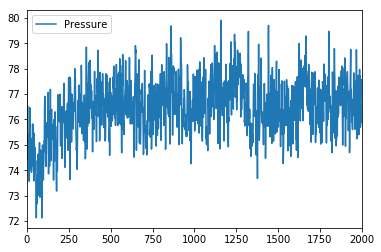

In [39]:
df = pd.DataFrame(X[:,1], columns=['Pressure'])
df.plot();

'-59.5403,-25.9511,-21.6852,-3.91611,21.3429,3.28842,7.30611,-1.26761,7.09324,0.886323,16.0818,\n-59.5403,-25.9511,-21.6852,-3.91611,21.3429,3.28842,7.30611,-1.26761,7.09324,0.886323,16.0818,\n-15.22,-26.5089,-20.9197,-3.89735,20.7655,3.15198,6.59051,-1.16157,4.42472,0.419876,14.5823,\n-13.9921,-28.0866,-19.6639,-4.08658,18.7959,3.5223,8.28261,-2.46139,2.89478,0.298286,15.9943,\n-12.7064,-29.6185,-18.9493,-3.59853,16.8333,3.68465,8.02169,-2.44636,3.66118,0.292126,15.4865,\n-10.6472,-31.1765,-17.864,-3.61094,13.9959,3.6639,7.74795,-2.40004,4.40676,0.285099,15.0122,\n-9.49087,-32.7563,-17.0805,-3.19964,10.2602,4.64974,7.49236,-2.28336,4.25944,0.283698,13.7216,\n-7.70196,-34.3929,-16.4772,-4.75196,8.10539,4.60708,6.91145,-2.14403,5.02915,0.259418,13.5951,\n-6.87473,-36.0636,-16.0773,-4.87511,6.95641,4.6556,6.69133,-2.08515,4.02524,0.240628,12.7927,\n-6.08509,-37.7287,-14.2639,-4.87243,4.2242,4.9433,6.46653,-2.02573,4.50101,0.317527,11.6795,\n-5.34553,-38.9227,-13.7112,-4.57215,3.14017,5.1